# Clustering with k-means

## Imports

In [1]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score
from math import sqrt

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rnd


## Reading and showing dataset

In [2]:
dataset = pd.read_csv('/home/vutaliy/Downloads/dataset_191_wine.csv')
main_attribute = pd.unique(dataset['class'])
classes = dataset['class'].to_numpy()

objects = dataset.iloc[:,1:].to_numpy()
objects = MinMaxScaler().fit_transform(objects)
print(objects.shape)

objects_embedded = TSNE().fit_transform(objects)
print(objects_embedded.shape)


(178, 13)
(178, 2)


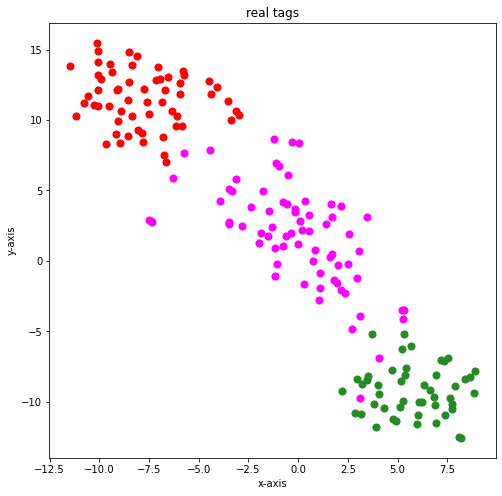

In [3]:
def dif_ds_by_class(X, y, y_dim):
    ans = [[] for _ in range(y_dim)]
    for x_, y_ in zip(X, y):
        ans[y_ - 1].append(x_)

    for i in range(len(ans)):
        ans[i] = np.array(ans[i])
    return np.array(ans)

def gen_scatters(objs_by_cl):
    if (len(objs_by_cl) > 7):
        raise ValueError('Something went wrong')
    
    colors = ['red', 'magenta', 'forestgreen', 'blue', 'black', 'orange', 'cyan']
    for ix, o in enumerate(objs_by_cl):
        ax.scatter(o[:,0], o[:,1], color=colors[ix], s=50)


objects_by_classes = dif_ds_by_class(objects_embedded, classes, len(main_attribute)) 
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set(xlabel='x-axis', ylabel='y-axis', title='real tags')

gen_scatters(objects_by_classes)

## k-means clustering

In [8]:
def euclidian_distance(vec1, vec2):
    ans = 0
    for v1, v2 in zip(vec1, vec2):
        ans += (v1 - v2) ** 2
    return sqrt(ans)

def diff(vec1, vec2):
    ans = 0
    for v1, v2 in zip(vec1, vec2):
        for vv1, vv2 in zip(v1, v2):
            ans += abs(vv1 - vv2)
    return ans

def mean(vec):
    ans = [0 for _ in range(vec.shape[1])]
    for v in vec:
        ans += v
    return ans / len(vec)

def k_means(X, k=3, max_iters=2000):
    initial_cluster_cord = [[0 for __ in range(X.shape[1])] for _ in range(k)]
    new_cluster_cord = [[rnd.random() for __ in range(X.shape[1])] for _ in range(k)]

    cluster_objs = [np.array([[0 for __ in range(X.shape[1])]]) for _ in range(k)]
    cluster_inds = [np.array([0]) for _ in range(k)]

    iters = 0
    while diff(initial_cluster_cord, new_cluster_cord) != 0 or max_iters > iters:
        iters += 1
        initial_cluster_cord = [ncc.copy() for ncc in new_cluster_cord]

        for i, x in enumerate(X):
            min_dis = float('inf')
            tag = -1
            
            for ix, ncc in enumerate(new_cluster_cord):
                dis = euclidian_distance(x, ncc)
                
                if (dis < min_dis):
                    tag = ix
                    min_dis = dis
            
            cluster_objs[tag] = np.append(cluster_objs[tag], [x], axis=0)
            cluster_inds[tag] = np.append(cluster_inds[tag], i)

        new_cluster_cord = [mean(co) for co in cluster_objs]

        if diff(initial_cluster_cord, new_cluster_cord) == 0 or max_iters == iters: 
            for i in range(len(cluster_objs)):
                cluster_objs[i] = cluster_objs[i][1:,:]
                cluster_inds[i] = cluster_inds[i][1:]

            return cluster_objs, cluster_inds
        cluster_objs = [np.array([[0 for __ in range(X.shape[1])]]) for _ in range(k)]
        cluster_inds = [np.array([0]) for _ in range(k)]


def get_preds(clusters, cluster_inds):
    ans = [0] * len(objects)
    for ix, c in enumerate(clusters):
        for _, cli in zip(c, cluster_inds[ix]):
            ans[cli] = ix+1
    return ans 

clusters_def, cl_inds = k_means(objects)
preds = get_preds(clusters_def, cl_inds)
objects_by_clusters = dif_ds_by_class(objects_embedded, preds, len(clusters_def))
print(preds)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


## Plots for cheking diff between tags

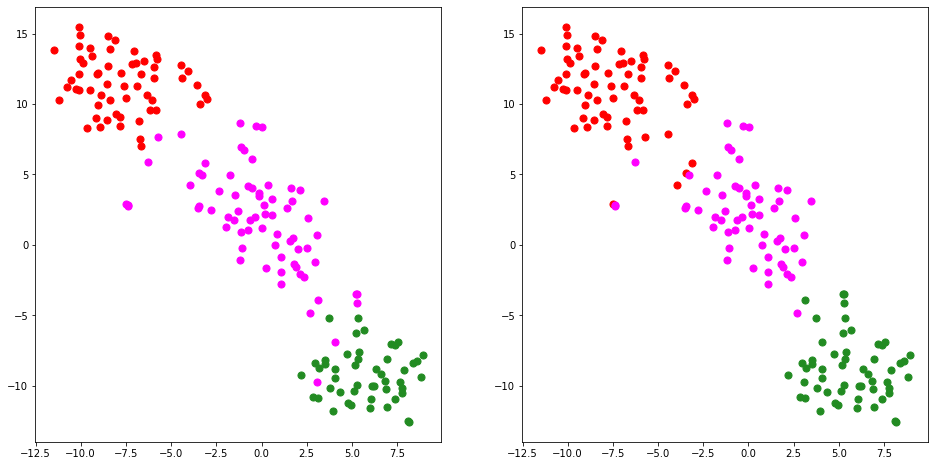

In [9]:
buff = [objects_by_classes, objects_by_clusters]

fig, axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

def gen_new_scatters(objs_by_cl, ax_y, ax_x, ax):
    if (len(objs_by_cl) > 7):
        raise ValueError('Something went wrong')
    
    colors = ['red', 'magenta', 'forestgreen', 'blue', 'black', 'orange', 'cyan']
    for ix, o in enumerate(objs_by_cl):
            ax.scatter(o[:,0], o[:,1], color=colors[ix], s=50)

for ix, ax in enumerate(axs):
    gen_new_scatters(buff[ix], 0, ix, ax)

plt.show()

In [16]:
iters = 100
sizes = [i for i in range(2,8)]
best_fscores = [float('-inf') for _ in range(0,6)]
best_clusters = [NotImplemented for _ in range(0,6)]


for size in sizes:
    for i in range(iters):
        clusts, inds = k_means(objects, k=size)
        predicted = get_preds(clusts, inds)
        fscore = f1_score(classes, predicted, average='macro')
        
        if best_fscores[size-2] < fscore:
            best_fscores[size-2] = fscore
            best_clusters[size-2] = dif_ds_by_class(objects_embedded, predicted, size)
        
        # print(i)
    
    print("{0} clusters done".format(size))


2 clusters done
3 clusters done
4 clusters done
5 clusters done
6 clusters done
7 clusters done


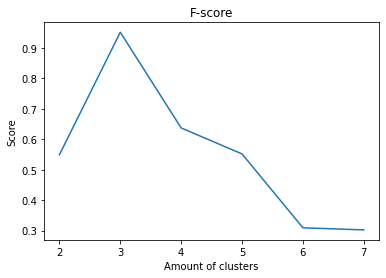

In [17]:
plt.xlabel("Amount of clusters")
plt.ylabel("Score")
plt.title("F-score")
plt.plot(sizes, best_fscores)

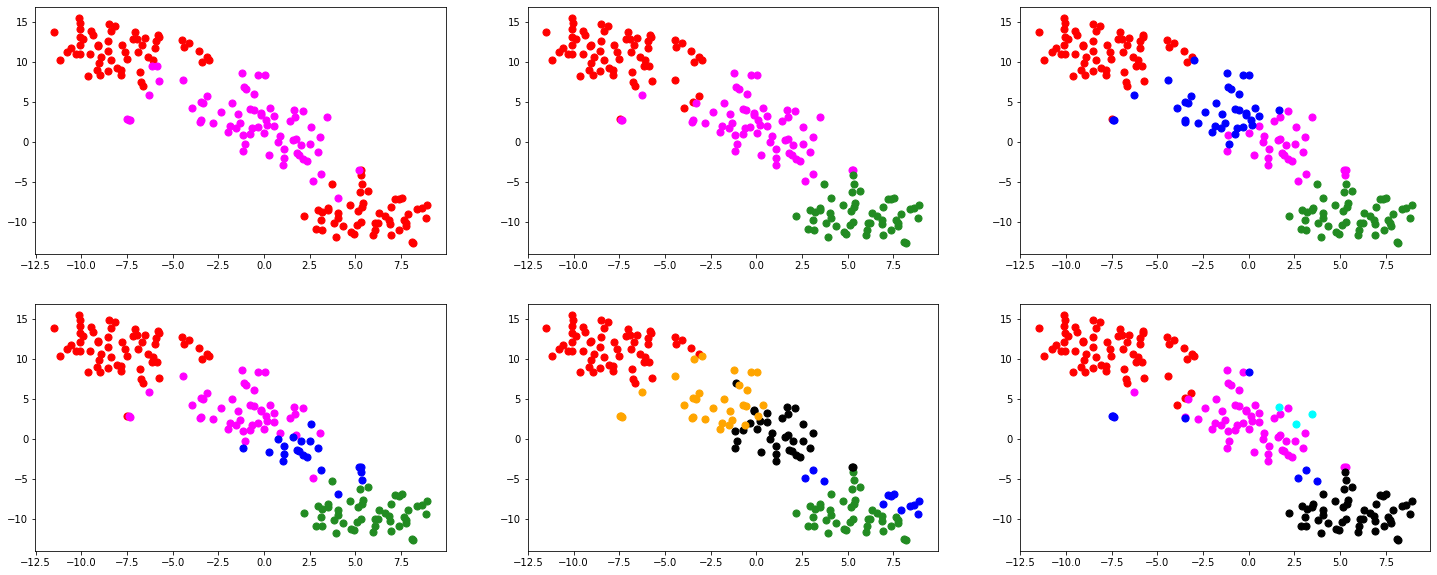

In [33]:
fig, axs = plt.subplots(2,3)
fig.set_figheight(10)
fig.set_figwidth(25)

def gen_new_scatters_1(objs_by_cl, ax):
    if (len(objs_by_cl) > 7):
        raise ValueError('Something went wrong')
    
    colors = ['red', 'magenta', 'forestgreen', 'blue', 'black', 'orange', 'cyan']
    for ix, o in enumerate(objs_by_cl):
        if len(o) > 1:
            ax.scatter(o[:,0], o[:,1], color=colors[ix], s=50)

len(best_clusters)

for ix in range(len(axs)):
    for jx in range(len(axs[ix])):
        if ix == 0:
            gen_new_scatters_1(best_clusters[ix+jx], axs[ix][jx])
        else:
            gen_new_scatters_1(best_clusters[ix+jx+2], axs[ix][jx])


plt.show()

## Silhouette (external assesment)

In [35]:
def precalculate_distances():
    distances = []
    for obj_i in objects:
        buff = []
        for obj_j in objects:
            buff.append(euclidian_distance(obj_i, obj_j))
        distances.append(buff)
    return distances

distances = precalculate_distances()

In [36]:
def silhouette(clusters, inds):
    ans = 0
    for ix, cluster1 in enumerate(clusters):
        
        for i in range(len(cluster1)):
            alpha = 0
            beta = float('inf')

            for jx, cluster2 in enumerate(clusters):
                buff_1 = 0
                for j in range(len(cluster2)):
                    if (jx == ix):
                        alpha += distances[inds[ix][i]][inds[jx][j]]
                    else:
                        buff_1 += distances[inds[ix][i]][inds[jx][j]]
                
                if (jx != ix and len(cluster2) != 0):
                    beta = min(beta, buff_1 / len(cluster2))

            
            alpha /= len(cluster1)
            ans += (beta - alpha) / max(beta, alpha)
            # print(alpha, beta)

    return ans / sum([cluster.shape[0] for cluster in clusters]) 

silhouette(clusters_def, cl_inds)
silhts = []
cl_am = [i for i in range(2,8)]
sl_clusters = []

for i in cl_am:
    clusters, indexs = k_means(objects, k=i)
    predicted = get_preds(clusters, indexs)
    silht = silhouette(clusters, indexs)
    silhts.append(silht)
    sl_clusters.append(dif_ds_by_class(objects_embedded, predicted, size))
    print(silht)
    print()


0.30658732423418633

0.3095853011003517

0.26246438709315895

0.26307661811474803

0.2445128385994651

0.21478653271568998



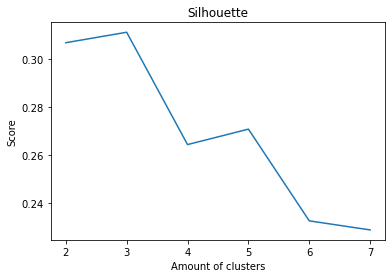

In [114]:
plt.xlabel("Amount of clusters")
plt.ylabel("Score")
plt.title("Silhouette")
plt.plot(cl_am, silhts)

In [ ]:
fig, axs = plt.subplots(2,3)
fig.set_figheight(10)
fig.set_figwidth(25)

def gen_new_scatters_1(objs_by_cl, ax):
    if (len(objs_by_cl) > 7):
        raise ValueError('Something went wrong')
    
    colors = ['red', 'magenta', 'forestgreen', 'blue', 'black', 'orange', 'cyan']
    for ix, o in enumerate(objs_by_cl):
        if len(o) > 1:
            ax.scatter(o[:,0], o[:,1], color=colors[ix], s=50)


for ix in range(len(axs)):
    for jx in range(len(axs[ix])):
        if ix == 0:
            gen_new_scatters_1(sl_clusters[ix+jx], axs[ix][jx])
        else:
            gen_new_scatters_1(sl_clusters[ix+jx+2], axs[ix][jx])


plt.show()